In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('twitchdata-update.csv')



In [60]:
# Handle missing values using mean for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Create binary target: High Growth = 1, Low Growth = 0
median_followers = data['Followers gained'].median()
data['Growth_Category'] = np.where(data['Followers gained'] > median_followers, 1, 0)

# Encode the 'Language' column
le = LabelEncoder()
data['Language_encoded'] = le.fit_transform(data['Language'])

# Select features and target variable
X = data[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
          'Average viewers', 'Language_encoded']]
y = data['Growth_Category']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\naman\AppData\Local\Temp\ipykernel_1628\289641011.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [73]:
# Train an XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=69)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]


C:\Users\naman\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:55:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
# Evaluate the model
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob):.2f}")


XGBoost Results:
Accuracy: 67.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       108
           1       0.62      0.75      0.68        92

    accuracy                           0.67       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.67      0.67       200

AUC-ROC Score: 0.78


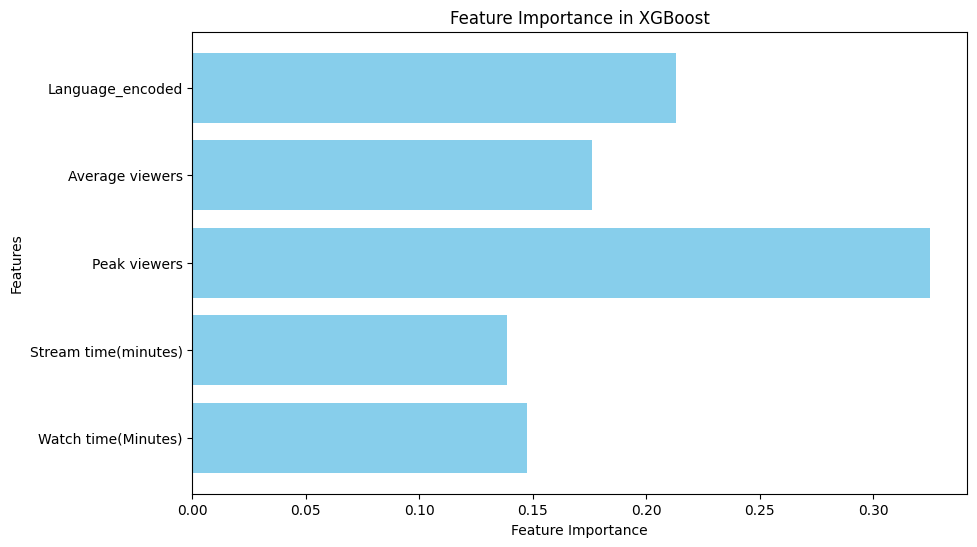

In [75]:
# Feature importance
importance = xgb_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.show()


In [79]:
import joblib

# Save the trained model
joblib.dump(xgb_clf, 'model2.pkl')

['model2.pkl']